# Решение тестовых задач. Щиголев Борис

В данной тетрадке предлагается решение 5-ти тестовых задач, присланных 28.12.2023 г., для прохождения этапа тестирования технических навыков на позицию Аналитика данных.

Тестовое задание состоит из нескольких задач, которые необходимо реализовать на языке Python и/или R в соответствии с техническим заданием. **Решение задач реализовано на языке Python с использованием библиотек для анализа данных.**

Перед решением задач импортируем сразу все необходимые библиотеки. В разных задачах используются одинаковые глобальные переменые, которые первоначально заданы в той задаче, где впервые испольуются. Например, уровень значимости, мощность тестов и пр.

In [1]:
# импортируем необходимые библиотеки
# общие
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# дополнительно для задачи 2
import math as mth
import scipy.stats as stats
from scipy.stats import beta

# дополнительно для задачи 3
from datetime import datetime, timedelta
import itertools
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# дополнительные для задачи 4-5
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
start_time = time.time()

# 1 Успешность прототипа

Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных. Наша компания выпустила 200 прототипов из которых ни один не был успешен.
Какова вероятность что следующий (201й) наш прототип будет успешен? Какими методами можно решать данную задачу? Предложите как минимум 2 варианта. Если у вас есть какой-то вариант решения задачи для которого требуются доп. данные - перечислите что требуется и метод решения.

## Решение

Задачу можно решить несколькими способами:
- на основании данных о частоте успехов конкурента
- прямой подсчет успехов
- найти вероятность используя теорему Байеса

### Решение 1
Т.к. компания конкурент выпустила 1000 прототипов игр, из которых 5 были успешными, то вероятность выпуска успешного прототипа составляет 5/1000 = 0,005 или 0,5%. Допустим, что оригинальная компания аналогина компании конкуренту: имеет схожие материальные, технические и кадровые ресурсы. Т.о. вероятность того, что 201 прототип также будет успешен составляет 0,5%.

In [3]:
success = 5 # число успешных прототипов у компании конкурента
attempts = 1000 # число выпушенных прототипов компанией конкурентом
print(f'Веротяность выпустить успешный прототип с 201 попытки составляет {100 * success / attempts}%')

Веротяность выпустить успешный прототип с 201 попытки составляет 0.5%


### Решение 2

Т.к. положительных исходов у нашей компании 0, то вероятность успешного выпуска прототипа с 201 попыки равна 0/200 ~ 0/201 ~ 0%.
Т.е. по историческим данным мы можем судить, что вероятность выпустить успешный прототип нашей компании очень низкая в и находится окрестности 0%, что связано с какими-либо ограничениями у нашей компании. Каких-либо дополнительных данных о том, что произошли существенные изменения, влияющие на выпуск и производство прототипов - нет, поэтому скорее всего вероятность успешности 201-го прототипа также равна 0. 

### Решение 3

Воспользуемся теоремой Байеса для обновления вероятности успеха выпустить успешный прототип на основе имеющихся данных.
Теорема Байеса формулируется в следующем виде:

P(A|B) = P(B|A) * P(A) / P(B), 

где:

- А - событие, что прототип успешен
- В - событие, что прототип разработан нашей компанией
- P(A|B) - апостериорная вероятность, т.е. вероятность, что выпущен успешный прототип на основании исторических данных об успехах
- P(B|A) - вероятность наблюдения 200 неуспешных прототипов из 200 ~ наблюдать 0 успехов из 200 попыток
- P(A) - априорная вероятность выпустить успешный прототип
- P(B) - вероятность наблюдения успешного результата нашей компании вообще или полная вероятность того, что прототип разработан нашей компание 

Формула Байеса в LaTex:
$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Т.к. отсутствуют какие либо данные об успешном выпуске прототипа, то за априорную вероятность выпустить успешный прототип примем вероятность выпуска компанией конкурентом P(A) = 5/1000

In [4]:
p_a = success / attempts

Тогда вероятность наблюдать 0 успехов из 200 попыток P(B|A) = (1-P(A))^200

In [5]:
p_b_a = (1 - p_a) ** 200

Вероятность наблюдать успешный результат вообще подсчитать в целом не представляется возможным из-за отсутствия данных, но предположительно P(B) -  сумма вероятности успешных и неуспешных прототипов нашей компании, что можно выразить в следующем виде:

P(B)=P(A)⋅P(B∣A)+P(¬A)⋅P(B∣¬A), 

где 
- P(¬A) - вероятность неуспешных прототипов нашей компании, что в соответствии с исходными данными равно 200/200 = 1
- P(B∣¬A) - вероятность наблюдать хотя бы один успех из 200 попыток, т.е. 1 - P(B|A) = (1-P(A))^200

тогда:

In [6]:
p_b = p_a * p_b_a + (200 / 200) * (1- p_b_a)
p_a_b = p_a * p_b_a / p_b

In [7]:
print(f'Вероятность выпустить успешный прототип на 201 раз равна {round(p_a_b, 5)} или {round(100 * p_a_b, 3)}%')

Вероятность выпустить успешный прототип на 201 раз равна 0.00289 или 0.289%


## Ответ:
На самом деле ни один из предложенных ответов нельзя считать истинно верным, т.к. для расчета вероятностей использовались различные методы оценки, на успех может влиять ряд факторов и случайностей, также мы не обладаем полнотой сведений о текущем состоянии нашей компании, которая к выпуску 201 прототипа могла улучшить свое материально техническое положение.

Т.о. получены 3 значения вероятности выпуска нашей компанией успешного прототипа на 201 раз:
- в результате прямого подсчета успехов вероятность составит 0%
- на основании данных о частоте успехов конкурента вероятность составит 0,5%
- в результате расчета с использованием теоремы Байеса вероятность составит 0,289%

# Задача 2. Сравнение групп платящих игроков

В мобильной игре около 10% игроков совершает платежи в первый месяц с момента установки игры (база расчета - 500 игроков). 
Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.
1.	Опишите оптимальный по вашему мнению дизайн эксперимента
2.	Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.
3.	Самостоятельно сгенерируйте датасет с около 10% плательщиков (контроль) и рассчитайте доверительный интервал.
4.	Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, ДИ и ваши выводы для каждого варианта.
5.	Решите задачу 2 разными подходами: frequentist / bayesian

## 2.1. Описание дизайна эксперимента

Для проверки гипотезы геймдизайнеров о повышении доли плательщиков целесообразнее использовать A/B-тестирование. Примерные шаги эксперимента:
1) Формулирование гипотез:
- НО: между платящими пользователями (долями пользователей), входящих в контрольную и эксперементальную группу, отсутствует статистически значимая разница
- Н1: различие между платящими пользователями статистически значимо 
2) Опеределение метрики/параметра для замеров. В данном случае - конверсия или переход пользовтеля в статус "плательщик/платящий"
3) Определение механизма разделения пользователей на группы случайным образом:
- первая группа контрольная, не получающая обновления
- вторая группа эксперементальная, получающая обновления.
4) Определение размера выборки, длительности эксперимента с учетом базовых значений, определение значения минимального наблюдаемого эффекта
5) Оценка достоверности эксперимента и анализ результатов А/Б тестирования
6) Разработка рекомендаций

Для подтверждения гипотезы геймдизайнеров в целом также можно использотать иные способы и методы, например проведение интервью или анкетирование пользователей, в рамках которого будет предложено оценить обновление и дать ответ на вопрос типа "Готовы ли вы заплатить?". Также можно провести тетсирование в рамках релиза на ограниченную аудиторию пользователей, объединенных одинаковыми признаками, например, проживающих на отдельной территории, общими поло-возрастными характеристиками. 

## 2.2. Расчет длительности эксперимента

### 2.2.1. Расчет с помощью онлайн-калькуляторов

Для расчета длительности эксперимента целесообразно воспользоваться существующими калькуляторами для расчета размера необходимой выборки, на которой будет заметно изменение показателя, если оно есть, например:
- https://www.evanmiller.org/ab-testing/sample-size.html
- https://mindbox.ru/tools/ab-test-calculator/
- https://www.optimizely.com/sample-size-calculator

Воспользуемся стандартными предзаданными параметрами уровня значимости  = 0,05 (или 5%) и мощностью теста 1-β = 0,8 (или 80%).
Заметим, что в различных калmкуляторах используются различные типы "минимального наблюдаемого значения" (MDE) - абсолютные или относительные. В условии задачи необходимо оценить длительность (и соответственно размер выборки) при изменении конверсии с 10% до 11% (а как уже отмечалось выше мы оцениваем измение именно конверсии, т.е. совершение пользователем оплаты после регистрации в первый месяц). Поэтому, абсолютный прирост составляет 1%, относительный прирост - 100%* 1/10 = 10%.

Размеры выборок в соответствии с расчетом в онлайн-калькуляторах составляют:
$$n_{evanmiller} = 14 313$$
$$n_{mindbox} = 14 128$$
$$n_{optimizely} = 14 000$$


Таким образом, для достоверного сравнения необходимо дополнительно набрать от 13 500 до 13 813 пользователей. Т.к. в среднем за 1 день в системе регистрируется около 100 новых игроков, минимальная длительность тестирования составит 135-138 дней, т.е. 4,5 месяца

Учтем также, что для расчета с помощью онлайн калькуляторов используется двухсторонний Z-тест, для [которого](https://datascience.eu/wp-content/uploads/2020/05/image1.png):
- Z-значение для уровня значимости α = 0,05 равно 1,96
- Z-значение для мощности теста (1 - β) =  0,8 равно 0,84


### 2.2.2 Самостоятельный расчет с помощью формулы



$$n = \left( \frac{Z_{1-\alpha/2} \sqrt{2 \bar{p}(1-\bar{p})} + Z_{1-\beta} \sqrt{p_1(1-p_1) + p_2(1-p_2)}}{\Delta p} \right)^2 $$


In [8]:
# определим переменные для формулы
alpha = 0.05
beta_par = 0.2
z_imp = 1.96
z_pow = 0.84
p1 = 0.1
p2 = 0.11
p_avg = (p1 + p2) / 2
delta_p = p2 - p1

In [9]:
# расчет по формуле
n = ((z_imp * (2 * p_avg * (1-p_avg)) ** (0.5) + z_pow * ((p1*(1-p1) + p2*(1-p2)) ** (0.5))) / delta_p) ** 2
print('Минимальный размер выборки:', round(n), 'пользователей')
print('Необходимая длительность теста - не менее', round((n-500)/100), 'дней')

Минимальный размер выборки: 14734 пользователей
Необходимая длительность теста - не менее 142 дней


Однако, нам необходимо оценить увеличение конверсии на 1%, т.о. достаточно проведение одностороннего теста, т.е. вместо значения Z_1-alpha/2 необходимо использовать значение Z_1-alpha, которое в данном случае равняется 1,64

In [10]:
# расчет по формуле с измененным z-значением для уровня значимости 
z_imp = 1.64
n = ((z_imp * (2 * p_avg * (1-p_avg)) ** (0.5) + z_pow * ((p1*(1-p1) + p2*(1-p2)) ** (0.5))) / delta_p) ** 2
print('Минимальный размер выборки:', round(n), 'пользователей')
print('Необходимая длительность теста - не менее', round((n-500)/100), 'дней')

Минимальный размер выборки: 11559 пользователей
Необходимая длительность теста - не менее 111 дней


Стоит отметить, что z-значения также можно рассчитать с помощью методов библиотеки scipy

In [11]:
print('Z-значение для уровня значимости для двухсороннего теста:', stats.norm.ppf(1 - alpha / 2))
print('Z-значение для уровня значимости для одностороннего теста теста:', stats.norm.ppf(1 - alpha))
print('Z-значение для мощности теста:', stats.norm.ppf(1 - beta_par))

Z-значение для уровня значимости для двухсороннего теста: 1.959963984540054
Z-значение для уровня значимости для одностороннего теста теста: 1.6448536269514722
Z-значение для мощности теста: 0.8416212335729143


Таким образом, в любом случае рассчет показывает, что для подтверждения гипотезы о росте конверсии необходимо около 3 месяцев тестирования и набора необходимого кол-ва пользователей, чтобы наблюдать минимальный эффект.

Скорее всего данный срок слишком долгий для проведения тестирования и возможно при таком "трафике" и наборе новых пользователей А/Б тестирование не самое оптимальное решение для проверки гипотезы, с другой стороны в рамках экспериента планируется определить "платежеспособность" пользователя в течении месяца после регистрации. Возможно, в геймдизайнеров компании и руководство устраивают подобные сроки

## 2.2.3 Доверительный интервал
Для нахождения доверительного интервала необходимо сегенировать массив, состоящий из 500 (база расчета) 0 и 1, которые характеризуют состояние пользователя: 0 - не плательщик, 1 - плательщик.
Допустим, что уровень доверия составляет 1 - alpha = 0.95

In [12]:
# зададим кол-во пользователей
users = 500
# зададим кол-во плательщиков - 10% от общего количества пользователей. Количество плательщиков - целое число
payers = int(0.1 * users)

# сгенерируем массив с помощью методов ones и zeros библиотеки numpy
data = np.append(np.ones(payers), np.zeros(users - payers))
# или используя ручной ввод  data = np.array([0] * 450 + [1] * int(500 * 0.1))

# перемешаем массив
np.random.shuffle(data)

# расчет доверительного интервала с помощью функции interval метода norm библиотеки scipy
# где 1 - alpha - уровень доверия, равный 95%; loc - среднее массива, scale - стандарная ошибка
conf_interval = stats.norm.interval(1 - alpha, loc=np.mean(data), scale=stats.sem(data))

In [13]:
print('Доверительный интервал для уровня доверия 95%', conf_interval)

Доверительный интервал для уровня доверия 95% (0.0736779885971165, 0.12632201140288352)


В условии задачи конкретно не указано, сколько конкретно плательщиков. около 10% в целом может лежать в интервале от 5,5% до 14,4%, в зависимости от того, в какую сторону округлять. Посчитаем доверительный интервал, если доля плательщиков лежит в диапазоне [8%, 12%].
Воспользуемся циклом.

In [14]:
# зададим список со значениями доли плательщиков
perc = [0.08, 0.09, 0.1, 0.11, 0.12]
# вычислим доверительный интервал с помощью цикла
for i in perc:
    users_test = 500
    payers_test = int(i * users_test)
    data_test = np.append(np.ones(payers_test), np.zeros(users_test - payers_test))
    np.random.shuffle(data_test)
    print(f'Доверительный интервал для {i*100}% платящих пользователей: {stats.norm.interval(1 - alpha, loc=np.mean(data_test), scale=stats.sem(data_test))}')

Доверительный интервал для 8.0% платящих пользователей: (0.0561967243794744, 0.1038032756205256)
Доверительный интервал для 9.0% платящих пользователей: (0.06489040146264557, 0.11510959853735442)
Доверительный интервал для 10.0% платящих пользователей: (0.0736779885971165, 0.12632201140288352)
Доверительный интервал для 11.0% платящих пользователей: (0.08254704083298192, 0.13745295916701808)
Доверительный интервал для 12.0% платящих пользователей: (0.09148786246342783, 0.14851213753657216)


Как видно из расчета значений границ доверительных интервалов - все ДИ пересекаются, что может свидетельствовать о том, что между группами отсуствует статистически значимая разница, т.е. нулевую гипотезу отвергнуть нельзя.

## 2.2.4. Эффект для нескольких групп

Первоначально сгенерируем как и в подзадаче 2.2.3 несколько эксперементальных групп:
- группа с худшими показателями, чем доля плательщиков 10%. Допустим в данной группе показатель конверсии снизился до 5%
- группа с лучшими показателями, чем доля плательщиков 10%. Допустим в данной группе показатель конверсии увеличился до 15%
- группа с неизмененными показателями, чем доля плательщиков 10%. 

Воспользуемся аналогичным циклом, как и в подзадаче 2.2.3

In [15]:
# создадим список с показателями конверсий
perc_m = [0.09, 0.11, 0.1]
# базовое количество пользователей
users_m = 500
# создадим пустой список для записи сгенерированных массивов
data_m = []

# цикл для создания сгенерированных массивов
for i in perc_m:
    # задание кол-ва платящих пользотвателей
    payers_m = int(i * users_m)
    # генерация массивов
    data_i = np.append(np.ones(payers_m), np.zeros(users_m - payers_m))
    # перемешивание данных
    np.random.shuffle(data_i)
    # запись в список
    data_m.append(data_i)

# запишем в отельные именные массивы 
data_bad = data_m[0] # группа с худшими показателями
data_good = data_m[1] # группа с лучшими показателями
data_neutral = data_m[2] # группа с неизмененнымит показателями

В итоге имеем 3 эксперементальных массива и 1 контрольный.

Сформулируем гипотезы
- Н0: между платящими пользователями (долями пользователей), входящих в контрольную и эксперементальную группу, отсутствует статистически значимая разница
- Н1: различие между платящими пользователями статистически значимо

### 2.2.4.1 Проверка гипотезы о равенстве среднего
Проведем проверку гипотезы о равенстве двух средних с использованием Т-теста. В рамках проверки гипотез предполагается сравение более 2-х групп - суммарно 3 проверки, что может дать возможность ошибиться с Т-тестом с вероятностью 1 − (1- 0,05 )^3 = 0,142 или 14% при интерпретации результатов

Создадим функцию, которая принимает на вход 2 массива, рассчитывает значение р-критерия Т-теста и проверяет верность гипотезы

In [16]:
def t_test(data_A, data_B):
    '''
    Функция принимает на вход массивы данных.
    Ввозвращает сравнение значения р-критерия Т-теста и уровня значимости, а также решение по принятию гипотезы
    '''
    p_value = stats.ttest_ind(data_A, data_B)[1]
    print('P-value: {0:.3f}'.format(p_value))
    print('Среднее первого набора данных: {0:.3f}'.format(data_A.mean()))
    print('Среднее второго набора данных: {0:.3f}'.format(data_B.mean()))
    if (p_value < alpha):
        print('Отвергаем H0: разница статистически значима')
    else:
        print('Не отвергаем H0: вывод о различии сделать нельзя')

С помощью цикла выведем результат применения функции для трех эксперементальных групп и 1 контрольной

In [17]:
# создадим список массивов 
data_list = [data_bad, data_good, data_neutral]
# создадим список наименований массивов
data_list_descr = ['Группа с худшими показателями', 'Группа с лучшими показателями', 'Группа с нейтральными показателями']
# с помощью цикла применим функцию для вывода результата
for i,j in zip(data_list, data_list_descr):
    print(f'Результат проверки {j} vs. контрольная группа')
    t_test(i, data)
    print('='*10)

Результат проверки Группа с худшими показателями vs. контрольная группа
P-value: 0.590
Среднее первого набора данных: 0.090
Среднее второго набора данных: 0.100
Не отвергаем H0: вывод о различии сделать нельзя
Результат проверки Группа с лучшими показателями vs. контрольная группа
P-value: 0.606
Среднее первого набора данных: 0.110
Среднее второго набора данных: 0.100
Не отвергаем H0: вывод о различии сделать нельзя
Результат проверки Группа с нейтральными показателями vs. контрольная группа
P-value: 1.000
Среднее первого набора данных: 0.100
Среднее второго набора данных: 0.100
Не отвергаем H0: вывод о различии сделать нельзя


### 2.2.4.2 Проверка гипотезы о равенстве долей
Аналогичным образом проведем z-тест сравнения долей платящих пользователей в экспериментальных и контрольных группах.
Для этого сосздаим функцию для расчета значения р-критерия Z-теста и проверки верности гипотезы

In [18]:
def z_test(data_A, data_B):
    '''
    Функция принимает на вход массивы.
    Возвращает сравнение знaчения р-критерия Z-теста и уровня значимости, а также решение по принятию гипотезы
    '''
    
    # доли совершивших дейтстиве в группах расчитываются как сумма элементов массивов разделенная на длину массива
    # доля совершивших действие в группе А
    p1 = np.sum(data_A) / data_A.shape[0]
    # доля совершивших действие в группе В
    p2 = np.sum(data_B) / data_B.shape[0]
    # комбинированная доля
    p_combo = (np.sum(data_A) + np.sum(data_B)) / (data_A.shape[0] + data_B.shape[0])
    # разность долей
    diff = p1 - p2
    # z-статистика
    z_value = diff / mth.sqrt(p_combo * (1 - p_combo) * (1 / data_A.shape[0] + 1 / data_B.shape[0]))
    
    # стандартное нормальное распределение
    distr = stats.norm(0, 1)
    #р-значение теста
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value, 'z-статистика', z_value)
    if p_value < alpha:
        print('Отвергаем H0: разница статистически значима')
    else:
        print('Не отвергаем H0: вывод о различии сделать нельзя') 

In [19]:
# с помощью цикла применим функцию для вывода результата
for i,j in zip(data_list, data_list_descr):
    print(f'Результат проверки {j} vs. контрольная группа')
    z_test(i, data)
    print('='*10)

Результат проверки Группа с худшими показателями vs. контрольная группа
p-значение:  0.5897197110271788 z-статистика -0.5392422499481173
Не отвергаем H0: вывод о различии сделать нельзя
Результат проверки Группа с лучшими показателями vs. контрольная группа
p-значение:  0.6060086207726982 z-статистика 0.5157792153519688
Не отвергаем H0: вывод о различии сделать нельзя
Результат проверки Группа с нейтральными показателями vs. контрольная группа
p-значение:  1.0 z-статистика 0.0
Не отвергаем H0: вывод о различии сделать нельзя


Т.о. реультаты тестирования показывают, что каких либо статистически значимых различий на группах пользователей размером 500 пользователей сделать нельзя. 

### 2.2.4.3 Проверка гипотез на большей выборке
В предыдущем пункте было полученное минимальный необходимый размер выборки пользоватаелей - около 11000 пользователей в каждой группе. 
Применим алгоритм из предыдущих пунктов для проведения тестирования на выборках большего размера:
- сгенерируем массивы размером 11000 элементов
- применим функции по принятию решения

In [20]:
# зададим кол-во пользователей
users_big = 11000
# создадим контрольный массив. зададим кол-во плательщиков - 10% от общего количества пользователей
payers_big = int(0.1 * users_big)
data_big = np.append(np.ones(payers_big), np.zeros(users_big - payers_big))
np.random.shuffle(data_big)

# создадим пустой список для записи сгенерированных массивов
data_m_big = []

# цикл для создания сгенерированных массивов
for i in perc_m:
    # задание кол-ва платящих пользотвателей
    payers_m_big = int(i * users_big)
    # генерация массивов
    data_i_big = np.append(np.ones(payers_m_big), np.zeros(users_big - payers_m_big))
    # перемешивание данных
    np.random.shuffle(data_i_big)
    # запись в список
    data_m_big.append(data_i_big)

# запишем в отельные именные массивы 
data_bad_big = data_m_big[0] # группа с худшими показателями
data_good_big = data_m_big[1] # группа с лучшими показателями
data_neutral_big = data_m_big[2] # группа с неизмененнымит показателями

 

In [21]:
# создадим список массивов 
data_list_big = [data_bad_big, data_good_big, data_neutral_big]
# создадим список наименований массивов
data_list_descr_big = ['Большая группа с худшими показателями', 'Большая группа с лучшими показателями', 
                   'Большая группа с нейтральными показателями']

# с помощью цикла применим функцию для вывода результата
for i,j in zip(data_list, data_list_descr):
    print(f'Результат проверки {j} vs. контрольная группа')
    print('t-test:')
    t_test(i, data_big)
    print('z-test:')
    z_test(i, data_big)    
    print('='*10)

Результат проверки Группа с худшими показателями vs. контрольная группа
t-test:
P-value: 0.465
Среднее первого набора данных: 0.090
Среднее второго набора данных: 0.100
Не отвергаем H0: вывод о различии сделать нельзя
z-test:
p-значение:  0.46515424275912975 z-статистика -0.7303860502829913
Не отвергаем H0: вывод о различии сделать нельзя
Результат проверки Группа с лучшими показателями vs. контрольная группа
t-test:
P-value: 0.467
Среднее первого набора данных: 0.110
Среднее второго набора данных: 0.100
Не отвергаем H0: вывод о различии сделать нельзя
z-test:
p-значение:  0.46687762827814816 z-статистика 0.727568729922335
Не отвергаем H0: вывод о различии сделать нельзя
Результат проверки Группа с нейтральными показателями vs. контрольная группа
t-test:
P-value: 1.000
Среднее первого набора данных: 0.100
Среднее второго набора данных: 0.100
Не отвергаем H0: вывод о различии сделать нельзя
z-test:
p-значение:  1.0 z-статистика 0.0
Не отвергаем H0: вывод о различии сделать нельзя


Т.е. на выборке большего размера, которая соответствует минимальной необходимой выборке для выявления эффекта получены следующие результат: **существует статистически значимая разница между платящими пользователями в группах, где зафикисировано ухудшение и улучшение конверсии на 1%**, т.о. гипотеза геймдизайнеров о том, что обновления, которые увеличат процент плательщиков с 10% до 11% подтверждается. Но также можно подтверждить гипотезу, о том, что обновления могут уменьшить долю плательщиков с 10% до 9%. 

В задании также требуется рассчитать доверительный интервал, воспользуемся алгоритмом, который применялся в подзадаче выше

In [22]:
# зададим список со значениями доли плательщиков
perc = [0.09, 0.11, 0.1]
users = [500, 11000]
# вычислим доверительный интервал с помощью цикла и выведем результат
for i in users:
    for j in perc:
        payers = int(i * j)
        data = np.append(np.ones(payers), np.zeros(i - payers))
        np.random.shuffle(data)
        print(f'Доверительный интервал для {j*100}% платящих пользователей из выборки в {i} пользователей: {stats.norm.interval(1 - alpha, loc=np.mean(data), scale=stats.sem(data))}')

Доверительный интервал для 9.0% платящих пользователей из выборки в 500 пользователей: (0.06489040146264556, 0.11510959853735443)
Доверительный интервал для 11.0% платящих пользователей из выборки в 500 пользователей: (0.08254704083298192, 0.13745295916701808)
Доверительный интервал для 10.0% платящих пользователей из выборки в 500 пользователей: (0.0736779885971165, 0.12632201140288352)
Доверительный интервал для 9.0% платящих пользователей из выборки в 11000 пользователей: (0.08465172855942943, 0.09534827144057056)
Доверительный интервал для 11.0% платящих пользователей из выборки в 11000 пользователей: (0.1041525995625264, 0.1158474004374736)
Доверительный интервал для 10.0% платящих пользователей из выборки в 11000 пользователей: (0.09439348814617698, 0.10560651185382303)


Как видно из приведенных значений доверительных интервалов, при увеличении выборки доверительный интервал сужается, однако все доверительные интервалы для экспериметальных групп практически не пересекаются:
- контрольная группа <=> группе с неизмененными показателями - (0,094; 0,105)
- группа с худшими показателями - (0,084; 0,095)
- группа с лучшими показателми - (0,104; 0,115)

Что говорит о том, что существует статистически значимая разница между группами и нулевая гипотеза может быть отвергнута.

## 2.2.5 Решение задачи 2-мя способами

В условии задачи указано, что необходимо решить "задачу 2 разными подходами: frequentist / bayesian":
- имеется ввиду, что надо решить глобальную задачу 2 разными подходами?
- или имеется ввиду, что надо решить п.2 "Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков" разными подходами? 

Вероятнее всего имеется ввиду, что необходимо проверить гипотезу из п.4 задачи, т.е. оценить "результаты А/В тестирования" с помощью байесовских методов

В предыдущих пунктах был продемонстрирован частотный подход (frequentist) к решению задачи. Ниже предложен вариант решения задачи с использованием байесовских методов

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий: <a class="tocSkip"> </h2> Я не знаком с практикой байесовских методов, поэтому возможно решение в корне неверное, но по крайней мере была осуществлена попытка и получен некий результат.   
</div>

#### Решение задания из п.4 bayesian-подходом

Из теории: для проведения А/В тестирования с использованием байесовских методов можно использовать бета-распределение для моделирования вероятности успеха. 


Шаги для проведения эксперимента:

1) определение априорных бета-распределений для обеих групп. Данные о расперделении отсутсвуют, поэтому можно выбрать  равномерное распределение, которое является бета-распределением Beta(1,1).
2) обновление априорных распределений с наблюдаемыми данными. Допустим, мы рассматриваем нашу большую контрольную группу размером 11000 пользователей с конверсией 10%: 1100 успехов и 9900 неудач, и тестовую (экспериментальную группу) размером 11000 пользователей с конверсией 11% - 1210 успехов и 9790 неудач. 
3) обновление апостериорных распределения до Beta(1100+1, 9900+1) для контрольной группы и Beta(1210+1, 9790+1) для тестовой группы.
4) генерация большого количества выборок из каждого апостериорного распеределения для сравнения
5) расчет % случаев, когда апостериорная конверсия тестовой группы больше, чем контрольной, что даёт байесовскую вероятность того, что изменения улучшили конверсию.

Т.о. необходимо:
- задать априорные параметры (1,1)
- задать параметры выборок: размер 11000, конверсии 10% и 11%
- задать апостериорные распределения Beta(1100+1, 9900+1) и Beta(1210+1, 9790+1)
- сгенерировать большое кол-во случайных выборок из апостериорных распределений
- сравнить среднее случайных выборок

In [23]:
# зададим априорные параметры для равномерного распределения бета распеределения
alpha_a, beta_a = 1, 1

# определим параметры контрольной и эксперементальной групп
# контрольная группа: размер и число успехов

control_users = 11000
control_suc = int(0.1 * control_users)
# тестовая группа: размер и число успехов
test_users = 11000
test_suc = int(0.11 * test_users)

# зададим апостериорные распределения Beta(1100+1, 9900+1) и Beta(1210+1, 9790+1)
control_post = beta(alpha_a + control_suc, beta_a + (control_users - control_suc))
test_post = beta(alpha_a + test_suc, beta_a + (test_users - test_suc))

# генерация выборок из апостериорных распределений, воспользуемся функцийе rvs из библиотеки scypi, которая позволяет
# генерировать выборку случайных значений из соответствующего распределения. Допустим 10 тыс. выборок
control_samples = control_post.rvs(10000)
test_samples = test_post.rvs(10000)

# сравнение среднего распределений
prob = np.mean(test_samples > control_samples)

print(f'Байесовская вероятность того, что тестовая группа лучше контрольной: {prob:.3f}')


Байесовская вероятность того, что тестовая группа лучше контрольной: 0.991


Т.е. существует 99.1% вероятность того, что показатель конверсии, а именно доли пользователей, которые становятся платящими, в тестовой группе лучше, чем в контрольной группе.
Значит с вероятностью 99,1% можно быть увереным, что нововведения/обновления улучшат конверсию 

Стоит отметить, что на маленькой выборке, наблюдается результат хуже. 

In [24]:
control_users = 500
control_suc = int(0.1 * control_users)
# тестовая группа: размер и число успехов
test_users = 500
test_suc = int(0.11 * test_users)

# зададим апостериорные распределения Beta(1100+1, 9,900+1) и Beta(1,210+1, 9,790+1)
control_post = beta(alpha_a + control_suc, beta_a + (control_users - control_suc))
test_post = beta(alpha_a + test_suc, beta_a + (test_users - test_suc))

# генерация выборок из апостериорных распределений, воспользуемся функцийе rvs из библиотеки scypi, которая позволяет
# генерировать выборку случайных значений из соответствующего распределения. Допустим 10 тыс. выборок
control_samples = control_post.rvs(1000)
test_samples = test_post.rvs(1000)

# сравнение среднего распределений
prob = np.mean(test_samples > control_samples)

print(f'Байесовская вероятность того, что тестовая группа лучше контрольной: {prob:.3f}')

Байесовская вероятность того, что тестовая группа лучше контрольной: 0.704


# 3 Предсказание оттока

В мобильной игре, после установки и запуска игры начинается туториал - игрок проходит обучение игре, которое состоит из нескольких последовательных шагов. 
Данные представляют собой набор строк - уникальный id игрока, datetime и номер шага туториала который пройден игроком.
Геймдизайнеры выдвинули гипотезу - если мы с высокой вероятностью сможем предсказать шаг на котором игрок уйдет из игры заранее, то запустив альтернативное продолжение туториала с этого шага мы избежим оттока и увеличим прохождение туториала.
1.	Как бы вы решали задачу предсказания отвала игрока?
2.	Как оценить качество полученной модели? Опишите методы которые знаете и какой считаете оптимальным и почему.
3.	Предположим что вы разработали модель которая с достаточной вероятностью предсказывает отвал. Опишите дизайн эксперимента и методологию по проверке гипотезы геймдизайнеров


## Решение
### 3.1. Введение
Перед нами задача прогнозирования оттока churn prediction, решаемая методами машинного обучения. Решение можно разделить на несколько этапов:
1) выгрузка данных, предобработка, проведение EDA для определения ключевых признаков, влияющих на отток пользователей. Оригинальный датаест предположительно состоит из 3-х атрибутов:
- id игрока
- датавремя совержение перехода на новых этап, включая этап регистрации
- номер этапа туториала
2) формирование дополнительных признаков и метрик, которые отсутствуют в оригинальном датасете, но характеризуют поведение пользователя (также данные признаки могу быть добавлены на предыдущем этапе)
3) выбор моделей их обучение на обучающих данных, проверка модели на тестовых данных. Модели можно выбрать любые, подходящие для задач churn prediction
4)  расчет метрик и оценка качества моделей. Определение лучшей модели предсказания оттока в зависимости от целевых значений метрик, которые приняты в компании и отражают суть бизнес-процессов.

Могут применяться различные метрики для оценки качества моделей, в зависимости от типа модели. Например, для оценки качества регрессионных моделей применяются следующие метрики:

- средний модуль ошибки (MAE, Mean Absolute Error)
- средняя квадратичная ошибка (MSE, Mean Squared Error) и корень из этой величины (RMSE, Root Mean Squared Error)
- коэффициент детерминации, или R-квадрат (R2);
- средняя абсолютная ошибка в процентах (MAPE, Mean Absolute Percentage Error).

Для моделей бинанрной классификации используются следующие метрики:
- доля правильных ответов (accuracy) - доля истинно положительных и истинно отрицательных прогнозов из общего числа прогнозов 
- точность (precision) - доля истинно положительных прогнозов среди истинно положительных и ложно положительных прогнозов
- полнота (recall) - доля истинно положительных прогнозов среди истинно положительных и ложно отрицательных прогнозов
- F1_score = 2 * precision * recall / (precision + recall)
- площадь под кривой ошибок (AUC-ROC) 

Продемонстрируем решение задачи прогнозирования оттока на сгенерированном наборе данных, содержащий следедующие атрибуты:
- id пользователя
- дата-время совершения шага
- номер шага, на который совершен переход

Допустим, туториал состоит из 5 последовательных шагов, регистрация пользователя осуществляется на шаге 0, после которого пользователь совершает 5 действий в туториале, 5 шаг - окончание туториала.
Допустим также, что в среднем все пользователи, прошедшие 5 этапов, справляются с туториалом за 24 часа

### 3.2 Генерация данных и создание датафрейма

In [25]:
'''
# исходные данные: количество пользователей и количество шагов
players = 1000  # количество игроков
max_stage = 5  # максимальный этап

# генерация данных
data = []
for player_id in range(players):
    # определение случайного времени регистрации (шаг 0) в промежутке не более 5 дней до сегодняшнего дня
    time = datetime.now() - timedelta(days=np.random.randint(1, 5))
    # определение случайным образом максимального этапа, до которого дойдет пользователь от 0 до 5
    max_stage_for_player = np.random.randint(0, max_stage + 1)

    # добавление для каждого игрока записи о переходе на следующий этап до максимально возможного для игрока
    for stage in range(max_stage_for_player + 1):
        data.append({'player_id': player_id,
                     'event_time': time,
                     'stage': stage})
        # увеличение времени для следующего шага на случайное число часов в промежутке от 1 до 24
        time = time + timedelta(hours=np.random.randint(1, 24), minutes=np.random.randint(1, 60))

'''

"\n# исходные данные: количество пользователей и количество шагов\nplayers = 1000  # количество игроков\nmax_stage = 5  # максимальный этап\n\n# генерация данных\ndata = []\nfor player_id in range(players):\n    # определение случайного времени регистрации (шаг 0) в промежутке не более 5 дней до сегодняшнего дня\n    time = datetime.now() - timedelta(days=np.random.randint(1, 5))\n    # определение случайным образом максимального этапа, до которого дойдет пользователь от 0 до 5\n    max_stage_for_player = np.random.randint(0, max_stage + 1)\n\n    # добавление для каждого игрока записи о переходе на следующий этап до максимально возможного для игрока\n    for stage in range(max_stage_for_player + 1):\n        data.append({'player_id': player_id,\n                     'event_time': time,\n                     'stage': stage})\n        # увеличение времени для следующего шага на случайное число часов в промежутке от 1 до 24\n        time = time + timedelta(hours=np.random.randint(1, 24),

In [26]:
'''
data = []
players = 10000  # количество игроков
max_stage = 5   # максимальный этап
days = 5

for player_id in range(players):
    # определение случайного времени регистрации (шаг 0) в промежутке не более 5 дней до сегодняшнего дня
    time = datetime.now() - timedelta(days=np.random.randint(1, days))
    
    # определение случайным образом максимального этапа, до которого дойдет пользователь от 0 до 5 с использованием геометрического распределения
    max_stage_for_player = np.random.geometric(p=0.5) - 1
    max_stage_for_player = min(max_stage_for_player, max_stage)

    # добавление для каждого игрока записи о переходе на следующий этап до максимально возможного для игрока
    for stage in range(max_stage_for_player + 1):
        data.append({'player_id': player_id,
                     'event_time': time,
                     'stage': stage})
        
        # использование экспоненциального распределения для времени между этапами
        time_increment = np.random.exponential(scale=10)  # среднее время в часах
        time = time + timedelta(hours=time_increment, minutes=np.random.randint(1, 60))

'''

"\ndata = []\nplayers = 10000  # количество игроков\nmax_stage = 5   # максимальный этап\ndays = 5\n\nfor player_id in range(players):\n    # определение случайного времени регистрации (шаг 0) в промежутке не более 5 дней до сегодняшнего дня\n    time = datetime.now() - timedelta(days=np.random.randint(1, days))\n    \n    # определение случайным образом максимального этапа, до которого дойдет пользователь от 0 до 5 с использованием геометрического распределения\n    max_stage_for_player = np.random.geometric(p=0.5) - 1\n    max_stage_for_player = min(max_stage_for_player, max_stage)\n\n    # добавление для каждого игрока записи о переходе на следующий этап до максимально возможного для игрока\n    for stage in range(max_stage_for_player + 1):\n        data.append({'player_id': player_id,\n                     'event_time': time,\n                     'stage': stage})\n        \n        # использование экспоненциального распределения для времени между этапами\n        time_increment = 

In [27]:
# создадим датафрейм
#df = pd.DataFrame(data)

Т.к. датарейм генерируется случайным образом, то каждый раз при запуске ячейки мы будем получать новый отличный сгенерированный датерейм, поэтому сохраним датафрейм в отдельный файл и в дальнейшем будет обращаться к данному файлу. Код с созданием датафрейма и сохранением закомментируем.

In [28]:
# сохраним в файл
#df.to_csv('df_new.csv')

In [29]:
# загрузим в датафрейм
df = pd.read_csv('C:/Users/Asus/ testcases/skytec/df_new.csv')

In [30]:
# удаление лишнего столбца с индексами
df = df.drop(['Unnamed: 0'], axis=1)

In [31]:
df.head()

,player_id,event_time,stage
0,0,2024-01-04 01:05:21.945254,0
1,1,2024-01-03 01:05:21.945254,0
2,1,2024-01-03 05:14:05.240997,1
3,2,2024-01-03 01:05:21.945254,0
4,3,2024-01-06 01:05:21.945254,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19546 entries, 0 to 19545
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   player_id   19546 non-null  int64 
 1   event_time  19546 non-null  object
 2   stage       19546 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 458.2+ KB


Датасет загружен успешно, данные сгенерированы, пропуски отсутствуют, дополнительной предобработк не требуется. 
Теперь необходимо определить, ушел ли пользователь в отток. Пользователь не прошел туториал (ушел в отток), если не достиг последнего 5-го этапа туториала. 

Для того, чтобы в дальнейшем при моделировании и доп. расчетах id игрока не воспринималось как число, добавим в player_id приставку id_ 

In [33]:
df['player_id'] = 'id_' + df['player_id'].astype(str)

Добавим дополнительный столбец "churn", где будет отражаться информация с оттоком. Для этого воспользуемся функцией

In [34]:
# определим максимальный этап для каждого пользователя
max_stage = df.groupby('player_id')['stage'].max().reset_index().rename(columns={'stage':'max_stage'})
# создадим список игроков, кто достиг 5-го этапа
top_list = max_stage.query('max_stage == 5')['player_id'].to_list()

In [35]:
# зададим функцию, которая для каждого игрока из списка выше в новом столбце отразит сведения об оттоке

def churn(player_id):
    try:
        if player_id in top_list:
            return 0
        else:
            return 1
    except:
        pass

In [36]:
df['churn'] = df['player_id'].apply(churn)

Добавим в датафрейм дополнительный столбец с расчетом разницы во времени между регистрацией и последующими шагами, максимальный этап, на который вышел пользователь, а также максимальное время нахождения в туториале.

Добавим также столбец с вычислением времени, которое тратит каждый пользователь на прохождение этапа

1) **Столбец с расчетом времени**

In [37]:
# преобразуем дату и время в правильный тип
df['event_time'] = pd.to_datetime(df['event_time'])

# создадим датафрейм, содержащий информацию о времени регистрации пользователей
reg_time = df[df['stage'] == 0][['player_id', 'event_time']]
reg_time = reg_time.rename(columns={'event_time': 'reg_time'})
# объединим датафреймы
df = df.merge(reg_time, on='player_id')

In [38]:
# добавим новый столбец с расчетом разницы во времени и переведем значения в часы
df['time_delta'] = df['event_time'] - df['reg_time']
df['time_delta_h'] = df['time_delta'].dt.total_seconds()/3600

2) **Столбцы с максимальными значениями**

In [39]:
# создадим датафреймы с информацией о максимальном этапе и максимальном времени в игре для каждого пользователя
# max_stage = df.groupby('player_id')['stage'].max().reset_index().rename(columns={'stage':'max_stage'}) #данный датафрейм создан ранее
max_time = df.groupby('player_id')['time_delta_h'].max().reset_index().rename(columns={'time_delta_h':'max_delta'})

In [40]:
# объединим датафреймы
df = df.merge(max_stage, on='player_id').merge(max_time, on='player_id')

3) **Время на прохождение этапа**

In [41]:
# т.к. датарейм отсортирован по порядку, то применим функцию diff() для вычисления разницы между соседними значениями
df['time_stage'] = df.groupby('player_id')['time_delta_h'].diff()

In [42]:
# т.к. частично для этапов 0 новый столбец заполнился пустыми значеними, замених их на 0
df['time_stage'] = df['time_stage'].fillna(0)

In [43]:
# удалим лишние столбцы
df = df.drop(['reg_time', 'time_delta'], axis=1)

In [44]:
df.head()

,player_id,event_time,stage,churn,time_delta_h,max_stage,max_delta,time_stage
0,id_0,2024-01-04 01:05:21.945254,0,1,0.00000,0,0.00000,0.00000
1,id_1,2024-01-03 01:05:21.945254,0,1,0.00000,1,4.14536,0.00000
2,id_1,2024-01-03 05:14:05.240997,1,1,4.14536,1,4.14536,4.14536
3,id_2,2024-01-03 01:05:21.945254,0,1,0.00000,0,0.00000,0.00000
4,id_3,2024-01-06 01:05:21.945254,0,1,0.00000,0,0.00000,0.00000


### 3.3. EDA

Исходный датафрейм представляет собой набор данных о регистрации 1000 пользователей в игре и прохождении этапов туториала c указанием оттока пользователя в период с:

In [45]:
df['event_time'].min(), df['event_time'].max()

(Timestamp('2024-01-03 01:05:21.945254'),
 Timestamp('2024-01-10 19:30:22.562348'))

Посмотрим на общее количество пользователей, которые дошли до определенного этапа туториала - в данном случае перед нами классическая воронка.

In [46]:
df_agg = df.groupby('stage')['player_id'].count().reset_index().sort_values(by='player_id', ascending=False)
df_agg['ratio'] = df_agg['player_id'] / df_agg['player_id'].max()
df_agg = df_agg.rename(columns={'player_id' : 'player_cnt'})
df_agg

,stage,player_cnt,ratio
0,0,10000,1.0000
1,1,4959,0.4959
2,2,2475,0.2475
3,3,1213,0.1213
4,4,598,0.0598
5,5,301,0.0301


Таким образом до конца туториала дошли 301 пользователь (3%), которые не ушли в отток

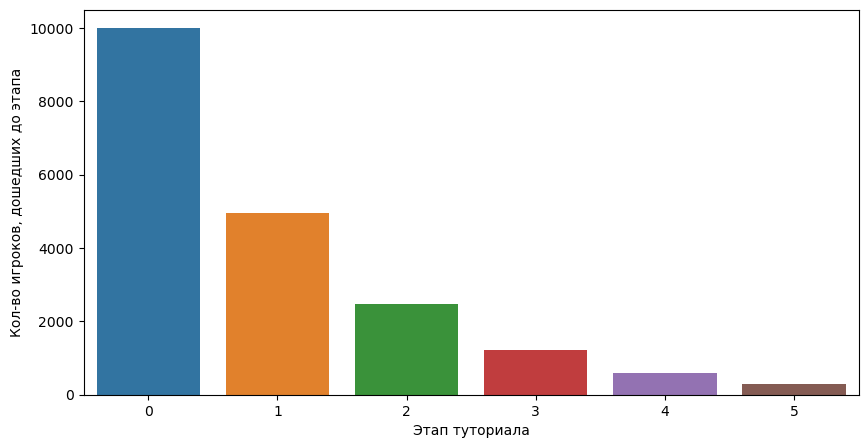

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_agg, x='stage', y='player_cnt')
plt.xlabel('Этап туториала')
plt.ylabel('Кол-во игроков, дошедших до этапа')
plt.show()

Посмотрим на общие распределения данных

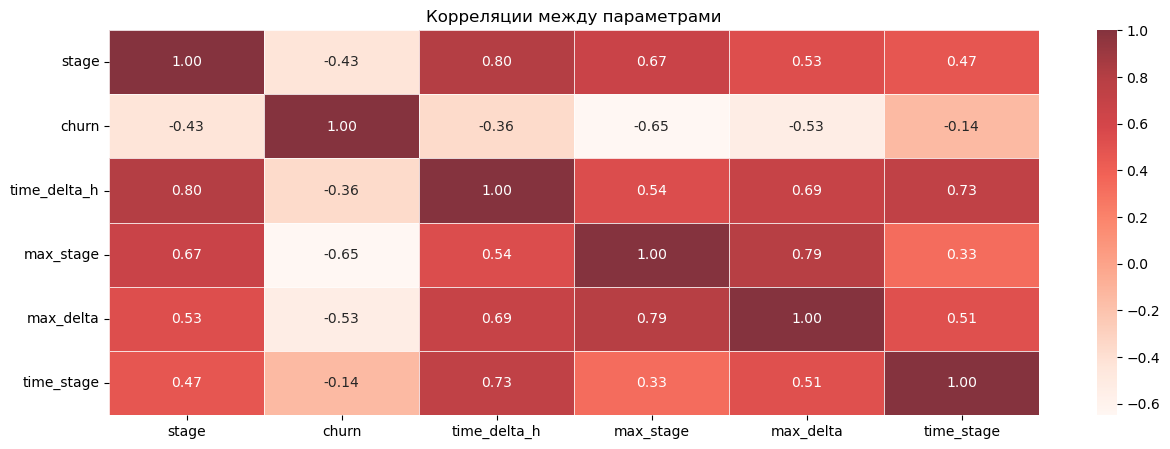

In [48]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.5, fmt = '0.2f', alpha=0.8, cmap='Reds')
plt.title('Корреляции между параметрами')
plt.show()

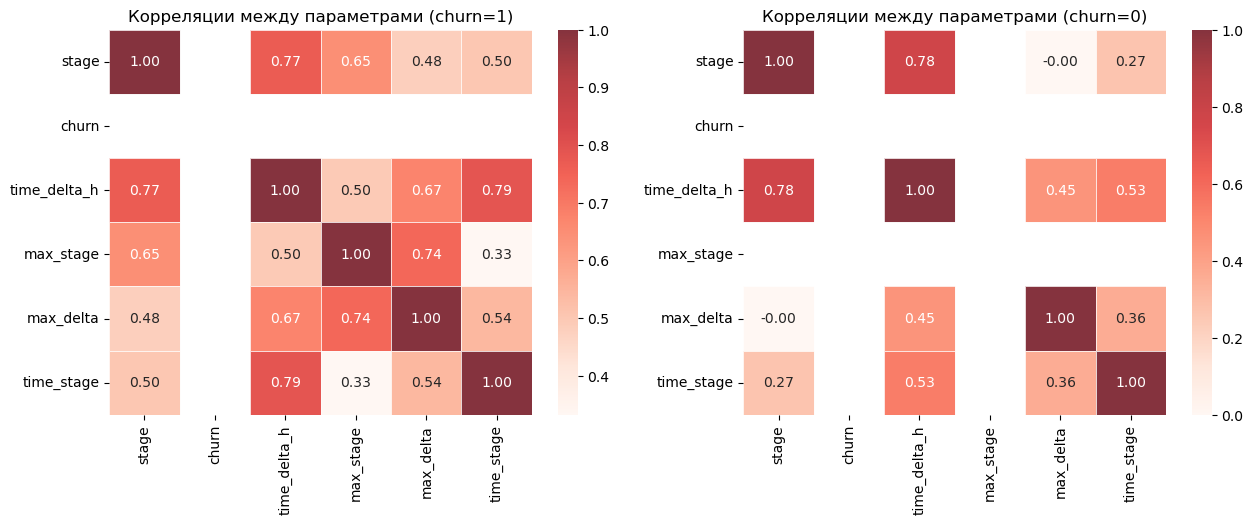

In [49]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
sns.heatmap(data=df.query('churn == 1').corr(), annot=True, linewidths=0.5, fmt = '0.2f', alpha=0.8, cmap='Reds')
plt.title('Корреляции между параметрами (churn=1)')

ax1 = plt.subplot(1, 2, 2)
sns.heatmap(data=df.query('churn == 0').corr(), annot=True, linewidths=0.5, fmt = '0.2f', alpha=0.8, cmap='Reds')
plt.title('Корреляции между параметрами (churn=0)')
plt.show()


Каких-либо выдающихся выводов из данных корреляций сделать нельзя, т.к. часть параметров изнаачльно зависимы друг от друга. 
Время, проведенное в туториале имеет сильную корреляцию с номером этапа (более 0,90). Максимальный номер этапа, на котором находится игрок, имеет обратную корреляцию с классом оттока пользователя. чем больше stage, тем вероятнее, что churn = 0.

Посмотрим на общие статистики:
- среднее время нахождения в туториале - 19 часов (медиана около суток)
- в среднем пользователи доходят до 2-3-го этапов туториала
- на прохождение одного этапа в среднем тратится 10 часов

In [50]:
df.query('stage !=0').describe().T

,count,mean,std,min,25%,50%,75%,max
stage,9546.0,1.827467,1.072971,1.000000,1.000000,1.000000,2.000000,5.000000
churn,9546.0,0.842342,0.364439,0.000000,1.000000,1.000000,1.000000,1.000000
time_delta_h,9546.0,19.068164,17.269531,0.072975,6.130992,14.094034,26.623362,114.416807
max_stage,9546.0,2.654934,1.393367,1.000000,1.000000,2.000000,4.000000,5.000000
max_delta,9546.0,27.699604,21.462346,0.113245,10.690032,22.737153,39.555413,114.416807
time_stage,9546.0,10.442534,9.760381,0.035491,3.431250,7.428603,14.400662,86.513304


На распределении ниже видно, что в целом время прохождения этапов не зависит от того, дойдет ли пользователь до финала или нет

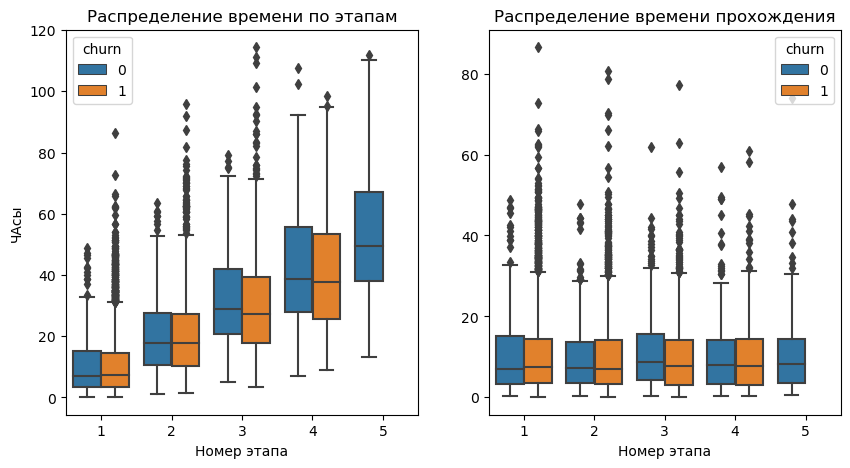

In [51]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=df.query('stage !=0'), x='stage', y='time_delta_h', hue='churn')
plt.title('Распределение времени по этапам')
plt.xlabel('Номер этапа')
plt.ylabel('ЧАсы')

ax1 = plt.subplot(1, 2, 2)
sns.boxplot(data=df.query('stage !=0'), x='stage', y='time_stage', hue='churn')
plt.title('Распределение времени прохождения')
plt.xlabel('Номер этапа')
plt.ylabel('')

plt.show()

### 3.4 Модель

Условием задачи не предумотрен перечень моделей, которые необходимо рассмотреть, поэтому проведем моделирование с помощью 4-х моделей -  логистическая регрессия, случайный лес, модель дерева принятия решений и Gradient Boosting. 
1) Подготовим данные
2) Разделим данные на выборки
3) Стандартизируем
4) Подготовим список моделей
5) Обучим модели и рассчитаем метрики

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий: <a class="tocSkip"> </h2> В первоначальном варианте вышло так, что точность моделей составила 1. Вероятно, что генерация случайными числами с нормальным распеределением привело к тому, что точность моделей составила 1. Также была осуществелена попытка генерации данных с помощью геометрического и экспоненциального распеределения. Результат такой же. С чем это может быть связано:
    
1) простота задачи, данные сгенерированы так, что классы легко разделимы, модели классифицируют их без ошибок
2) переобучение
3) целевая переменная "утекла" в признак, модель легко предугадывает значение
 
    
Однако после удаления из перечня переменных большей части переменных, метрики моделей изменились
</div>

In [52]:
# создадим копию датафрейма для моделирования, удалим лишние параметры
model_df = df.copy(deep=True)
model_df = model_df.drop(['player_id', 'event_time', 'max_delta', 'time_delta_h', 'max_stage'], axis=1)

# объявим константу
RANDOM_STATE = 0

# подготовим данные для моделирования. разделим данные на признаки и целевую функцию
X = model_df.drop(['churn'], axis=1)
y  = model_df['churn']

# разделим модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# стандартизируем данные, обучим StandartScaler  на обучающей выборке 
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуеv обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [53]:
#создадим список моделей
models = [LogisticRegression(solver='liblinear', random_state=RANDOM_STATE), 
          DecisionTreeClassifier(random_state=RANDOM_STATE), 
          RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE), 
          GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE)]

#создадим список названий моделей
models_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']
models_name_st = ['Logistic Regression ST', 'Decision Tree ST', 'Random Forest ST', 'Gradient Boost ST']

Т.к. в данном случае мы решаем задачу классификации, следовательно мы будем оценивать метрики accuracy, precision, recall, f1 и roc_auc

In [54]:
def make_predictions(m, model_name, X_train, y_train, X_test, y_test):
    model = m
    #обучаем модель
    model.fit(X_train, y_train)
    #запускаем модель
    y_pred = model.predict(X_test)
    y_probas = model.predict_proba(X_test)
    #рассчитываем метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probas[:,1])
    #записываем результат в датафрейм
    model_metrics = pd.DataFrame({'Model': [model_name],
                                  'Accuracy': [accuracy],
                                  'Precision': [precision],
                                  'Recall': [recall],
                                  'F1': [f1],
                                  'ROC_AUC': [roc_auc]})
    #результат функции - датафрейм
    return model_metrics

Применим данную функцию к обычной и стандаризированной выборкам

In [55]:
#создадим пустой датафрейм
all_metrics = pd.DataFrame()
#пройдем циклом по моделям и их названиям 
for model, model_name in zip(models, models_name):
    model_metrics = make_predictions(model, model_name, X_train, y_train, X_test, y_test)
    all_metrics = pd.concat([all_metrics, model_metrics])

In [56]:
#создадим пустой датафрейм
all_metrics_st = pd.DataFrame()
#пройдем циклом по моделям и их названиям 
for model, model_name in zip(models, models_name_st):
    model_metrics = make_predictions(model, model_name, X_train_st, y_train, X_test_st, y_test)
    all_metrics_st = pd.concat([all_metrics_st, model_metrics])

In [57]:
print('Метрики моделей на обычных данных')
display(all_metrics)
print('Метрики моделей на стандартизированных данных')
display(all_metrics_st)

Метрики моделей на обычных данных


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.922762,0.935371,0.982812,0.958505,0.800965
0,Decision Tree,0.889258,0.931101,0.948154,0.939550,0.519231
0,Random Forest,0.889258,0.931101,0.948154,0.939550,0.634021
0,Gradient Boost,0.923785,0.928779,0.992110,0.959401,0.797448


Метрики моделей на стандартизированных данных


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression ST,0.922762,0.935371,0.982812,0.958505,0.800965
0,Decision Tree ST,0.889258,0.931101,0.948154,0.939550,0.519231
0,Random Forest ST,0.889258,0.931101,0.948154,0.939550,0.634021
0,Gradient Boost ST,0.923785,0.928779,0.992110,0.959401,0.797448


Как видно из таблиц, стандартизация данных ни к чему не привела, что и не удивительно, т.к. стандартизация должна влиять только на логистическую регрессию, и не воспринимается другими моделями, в основе которых деревья принятия решений.

Также в результате расчета метрик выявлено, что наилучший результат показывают модели логистической регрессии и градиентного спуска.
Данные две модели:
- угадывают правильный ответ в 92-93% случаев;
- обнаруживают 92% правильных ответа класса "1"
- точность правильного ответа класса "1" составляет 99%
- 95% - сводная точность правильного прогноза
- показывают качество классификации 80%

# Задача 4. Эффективность рекламных кампаний

Отдел маркетинга оперирует некоторым множеством рекламных кампаний. Первая часть оперирования состоит из запуска тестовых рекламных кампаний, у которых есть требования по KPI при достижении которых тест считается успешным.
Успешные тесты переходят в разряд постоянных кампаний и вторая часть оперирования состоит из мониторинга постоянных кампаний - управление бюджетом кампании (COST) и мониторинг ее доходов (REVENUE), а так же соотношением доходов к расходам.
Главный KPI для постоянных рекламных кампаний - ROAS на 60й день, т.е. какой процент от расходов кампания возвращает на 60й день.

Для выполнения задачи необходимо использовать тестовый датасет (2 таблицы по расходам и доходам).
1.	Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том как эту зависимость описать и учесть во 2м вопросе.
2.	По каждой рекламной кампании рассчитайте суточный рекламный бюджет который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST).
3.	Исходя из пункта 2 по каждой рекламной кампании дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет либо вообще остановить.
4.	Решите проблему рекламных кампаний по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально


In [58]:
"""
query = '''
SELECT DATA(r.Installs_Dates) AS dates,
       r.campaign_id,
       r.Country AS country,
       c.installs,
       c.spends,
       r.1d_LTV,
       r.3d_LTV,
       r.7d_LTV,
       r.14d_LTV,
       r.30d_LTV,
       r.60d_LTV
FROM revenue AS r
JOIN costs AS c ON r.Install_Dates = c.Install_Dates AND r.campaign_id = c.campaign_id AND r.Country = c.Country
'''
merge_sql = pd.read_sql_query(query, con)
"""

"\nquery = '''\nSELECT DATA(r.Installs_Dates) AS dates,\n       r.campaign_id,\n       r.Country AS country,\n       c.installs,\n       c.spends,\n       r.1d_LTV,\n       r.3d_LTV,\n       r.7d_LTV,\n       r.14d_LTV,\n       r.30d_LTV,\n       r.60d_LTV\nFROM revenue AS r\nJOIN costs AS c ON r.Install_Dates = c.Install_Dates AND r.campaign_id = c.campaign_id AND r.Country = c.Country\n'''\nmerge_sql = pd.read_sql_query(query, con)\n"

## 4.1. Загрузка и предобработка данных

Изучим таблицы

In [59]:
# создадим подключение к БД
con = sqlite3.connect('C:/Users/Asus/ testcases/skytec/testcase.db')

# получим список всех таблиц в базе данных
query = 'SELECT name FROM sqlite_master WHERE type="table";'
db_tables = pd.read_sql_query(query, con)

In [60]:
# таблицы в базе данных testcase
db_tables

,name
0,source_comparison
1,costs
2,revenue


In [61]:
# таблица costs
query = 'SELECT * FROM costs'
costs = pd.read_sql_query(query, con)
print(costs.info())
print('Количество дубликатов', costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9934 entries, 0 to 9933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Install_Dates  9934 non-null   object 
 1   campaign_id    9934 non-null   int64  
 2   Country        9928 non-null   object 
 3   installs       9934 non-null   float64
 4   spends         9934 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 388.2+ KB
None
Количество дубликатов 2


In [62]:
# таблица revenue
query = 'SELECT * FROM revenue'
revenue = pd.read_sql_query(query, con)
print(revenue.info())
print('Количество дубликатов', revenue.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9934 entries, 0 to 9933
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Install_Dates  9934 non-null   object 
 1   campaign_id    9934 non-null   int64  
 2   Country        9928 non-null   object 
 3   1d_LTV         9934 non-null   float64
 4   3d_LTV         9934 non-null   float64
 5   7d_LTV         9934 non-null   float64
 6   14d_LTV        9934 non-null   float64
 7   30d_LTV        9934 non-null   float64
 8   60d_LTV        9934 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 698.6+ KB
None
Количество дубликатов 5


Таблицы выгружены корректно.

Объединим таблицы по 3-м ключам 'Install_Dates', 'campaign_id', 'Country'. Удалим дубликаты и заменим возможные пропуски в данных на 0, также переименуем столцы и изменим тип для даты

In [63]:
# объединение
merge_df = pd.merge(costs, revenue, on=['Install_Dates', 'campaign_id', 'Country'])

In [64]:
# удаление дубликатов и замена пропусков
merge_df = merge_df.drop_duplicates()
merge_df = merge_df.fillna(0)

In [65]:
# изменение типа
merge_df['Install_Dates'] = pd.to_datetime(merge_df['Install_Dates'], format='%Y-%m-%d')
# переименовывание столбцов
merge_df = merge_df.rename(columns={'Install_Dates' : 'dates', 'Country' : 'country'})
merge_df

,dates,campaign_id,country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV
0,2020-04-14,90570,CZ,35.0,19.79,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420
1,2020-04-28,90619,AT,5.0,4.99,1.032342,1.032342,1.248888,1.501317,1.761729,-1.000000
2,2020-05-10,794235,PK,79.0,0.40,0.212500,0.254620,0.390186,0.519535,0.652006,-1.000000
3,2020-05-07,91872,FR,12.0,9.56,4.661390,4.787784,6.422362,6.596973,6.596973,-1.000000
4,2020-04-03,19115,JP,6.0,3.39,0.833442,0.833442,1.103046,1.167516,1.398647,1.416652
...,...,...,...,...,...,...,...,...,...,...,...
10201,2020-04-02,90464,UN,0.0,0.45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10202,2020-04-27,19115,DE,27.0,21.33,31.003103,36.859179,45.552113,52.804398,58.205993,-1.000000
10203,2020-03-27,159253,DK,2.0,0.19,0.351962,0.351962,0.386234,0.448579,0.564261,0.693104
10204,2020-04-12,790034,RU,534.0,81.06,47.323662,56.483875,65.396237,75.178386,85.603100,92.690140


В целом наша объединенная таблица - классическое представление LTV в разрезе когорот, где когортой можно считать кампанию в стране на определенную дату, где installs - размер когорты

In [66]:
merge_df.query('campaign_id == 90570').sort_values(by='dates', ascending=True)

,dates,campaign_id,country,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV
6435,2020-04-03,90570,CZ,9.0,6.38,0.714333,0.762270,0.953802,1.521975,2.162345,2.898490
7091,2020-04-04,90570,CZ,30.0,14.65,1.291087,1.624842,2.581912,3.026456,3.279016,3.446244
4693,2020-04-05,90570,CZ,31.0,16.73,15.494891,15.691999,16.662292,32.784092,34.911865,35.303868
7542,2020-04-06,90570,CZ,43.0,22.62,33.002153,48.243965,50.813556,52.948198,54.086176,55.536989
5197,2020-04-07,90570,CZ,42.0,16.64,12.714745,13.600953,15.763636,21.460602,22.869683,25.066440
3140,2020-04-08,90570,CZ,43.0,20.84,11.319863,11.570167,12.401038,13.780287,14.254866,14.399581
5676,2020-04-09,90570,CZ,27.0,13.32,3.050487,4.332721,5.192126,6.282195,6.520664,6.520664
9290,2020-04-10,90570,CZ,59.0,32.91,4.685518,5.307169,6.540466,8.458698,9.862021,10.001585
1515,2020-04-11,90570,CZ,30.0,17.74,6.545396,7.302174,10.007253,10.454487,10.483410,10.586743
816,2020-04-12,90570,CZ,39.0,11.51,3.121109,4.401385,6.654974,8.542745,8.727295,8.756724


## 4.2 Подтверждение гипотезы

Посмотрим на общие корреляции между атрибутами в полученной объединенной таблице. Мы знаем, что отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня).

Посмотрим на общие корреляции между атрибутами в полученной объединенной таблице. 

In [67]:
merge_df.corr()

,campaign_id,installs,spends,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV
campaign_id,1.000000,0.070864,-0.043831,-0.075132,-0.074862,-0.069203,-0.063458,-0.056915,-0.020254
installs,0.070864,1.000000,0.816633,0.798790,0.801237,0.803796,0.808945,0.818476,0.666080
spends,-0.043831,0.816633,1.000000,0.855111,0.859562,0.859279,0.861179,0.863790,0.628638
1d_LTV,-0.075132,0.798790,0.855111,1.000000,0.996558,0.987947,0.982465,0.977361,0.704231
3d_LTV,-0.074862,0.801237,0.859562,0.996558,1.000000,0.991966,0.986592,0.981344,0.703792
7d_LTV,-0.069203,0.803796,0.859279,0.987947,0.991966,1.000000,0.995078,0.989465,0.712548
14d_LTV,-0.063458,0.808945,0.861179,0.982465,0.986592,0.995078,1.000000,0.995394,0.722169
30d_LTV,-0.056915,0.818476,0.863790,0.977361,0.981344,0.989465,0.995394,1.000000,0.728927
60d_LTV,-0.020254,0.666080,0.628638,0.704231,0.703792,0.712548,0.722169,0.728927,1.000000


Как видно, межу значениями LTV в различный период, количеством установок и расходами сущесвует высокая корреляционная зависимость, особенно между расходами и значением LTV на 1,3,7,14,30-е дни лайфтайма (более 0,85). На 60 день лайфтайма коэффициент корреляции средний и составляет 0,62.

В данном случае мы можем рассчитать показатель САС или совокупные затраты на одного пользователя (в нашем случае - установку. В нашем случае САС = spends / installs. В некоторых кампаниях количество установок равно 0, при делении на 0 возникнет ошибка в значении, поэтому заменим ошибки на 0 

In [68]:
merge_df['cac'] = merge_df['spends'] / merge_df['installs']
merge_df.replace([np.inf, -np.inf], 0, inplace=True)

Рассчитаем ROAS. Для этого нам необходимо разделить значения LTV на рекламные расходы

In [69]:
roas = merge_df.copy(deep=True)
ltv_list=['1d_LTV', '3d_LTV', '7d_LTV', '14d_LTV', '30d_LTV', '60d_LTV']
for i in ltv_list:
    roas[i] = roas[i]/roas['spends']
roas.replace([np.inf, -np.inf], 0, inplace=True)
roas = roas.fillna(0)
roas = roas.rename(columns={'1d_LTV':'1d_ROAS', 
                            '3d_LTV':'3d_ROAS', 
                            '7d_LTV':'7d_ROAS', 
                            '14d_LTV':'14d_ROAS', 
                            '30d_LTV':'30d_ROAS', 
                            '60d_LTV':'60d_ROAS'})
roas.sort_values(by='60d_ROAS', ascending=False)

,dates,campaign_id,country,installs,spends,1d_ROAS,3d_ROAS,7d_ROAS,14d_ROAS,30d_ROAS,60d_ROAS,cac
9540,2020-04-01,792044,US,7.0,0.01,81.513800,81.513798,115.169700,195.605600,195.605600,195.605600,0.001429
5843,2020-04-16,22083,DE,12.0,0.31,12.681742,13.332281,106.364233,134.610435,136.621329,137.528416,0.025833
5570,2020-04-02,792044,US,4.0,0.01,17.941300,17.941301,17.941300,118.412200,118.412200,118.412197,0.002500
8748,2020-04-11,90375,CH,1.0,0.14,103.104786,105.257222,114.975407,114.975407,114.975407,116.381471,0.140000
9776,2020-04-11,95525,UK,2.0,0.35,1.498360,1.666814,66.340816,69.000568,74.929265,103.050491,0.175000
...,...,...,...,...,...,...,...,...,...,...,...,...
9672,2020-05-07,794235,RE,2.0,0.01,1.495000,1.495000,3.289200,3.289200,3.289200,-100.000000,0.005000
4677,2020-05-15,794235,ME,1.0,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.010000
536,2020-05-17,794235,OM,1.0,0.01,0.522700,0.522700,0.522700,0.522700,1.115200,-100.000000,0.010000
7496,2020-04-28,794235,HU,2.0,0.01,39.750700,69.924998,143.687900,176.615800,238.972300,-100.000000,0.005000


Общая корреляция между рекламными тратами на кампании и ROAS на 60 день практически отсутствует, коэффициент корреляции равен 0,113

In [70]:
roas['spends'].corr(roas['60d_ROAS'])

0.11375734376535601

Посмотрим на общий показатель ROAS.
Сформируем новые агрегированные данные и выполним расчет ROAS

In [71]:
last_roas = merge_df.groupby('campaign_id')['spends', '1d_LTV', '3d_LTV', '7d_LTV', '14d_LTV', '30d_LTV', '60d_LTV'].agg('sum').reset_index()
last_roas['1d_ROAS'] = last_roas['1d_LTV'] / last_roas['spends']
last_roas['3d_ROAS'] = last_roas['3d_LTV'] / last_roas['spends']
last_roas['7d_ROAS'] = last_roas['7d_LTV'] / last_roas['spends']
last_roas['14d_ROAS'] = last_roas['14d_LTV'] / last_roas['spends']
last_roas['30d_ROAS'] = last_roas['30d_LTV'] / last_roas['spends']
last_roas['60d_ROAS'] = last_roas['60d_LTV'] / last_roas['spends']

In [72]:
print('Корреляция между расходами и рентабельностью вложений на 60 день',last_roas['spends'].corr(last_roas['60d_ROAS']))

Корреляция между расходами и рентабельностью вложений на 60 день 0.0010735295606659665


Как видно из диаграмм ниже, есть зависимость между тратами и LTV, при этом такой зависимости нет между тратами и ROAS

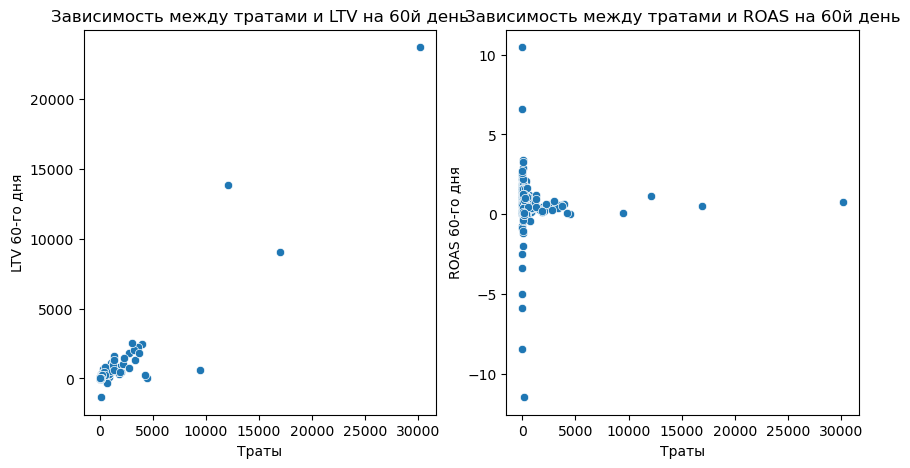

In [73]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1,2,1)
sns.scatterplot(last_roas, x='spends', y='60d_LTV')
plt.title('Зависимость между тратами и LTV на 60й день')
plt.xlabel('Траты')
plt.ylabel('LTV 60-го дня')

ax1=plt.subplot(1,2,2)
sns.scatterplot(last_roas, x='spends', y='60d_ROAS')
plt.title('Зависимость между тратами и ROAS на 60й день')
plt.xlabel('Траты')
plt.ylabel('ROAS 60-го дня')

plt.show()

В целом из 229 кампаний у части кампаний ROAS на 60й день меньше 0 или меньше чем ROAS на 30 день, т.е. можно заключить, что часть кампаний к 60му дню лайфтайма не окупаются

In [74]:
last_roas['campaign_id'].nunique()

229

На не очень наглядном графике продемонстрирована динамика ROAS для каждой кампании

In [75]:
test_df = pd.melt(last_roas, id_vars='campaign_id', value_vars=['1d_ROAS','3d_ROAS', '7d_ROAS', '14d_ROAS', '30d_ROAS', '60d_ROAS' ])

<AxesSubplot: xlabel='variable', ylabel='value'>

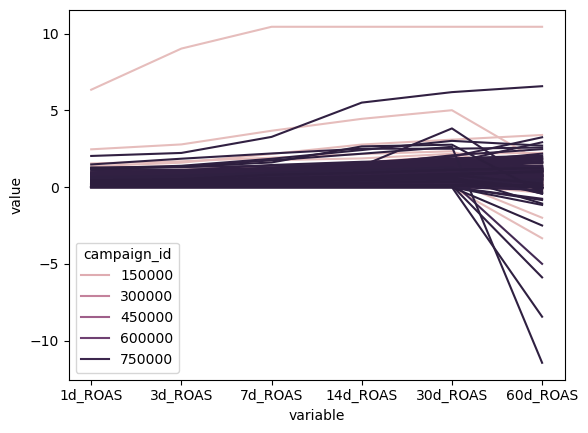

In [76]:
sns.lineplot(test_df, x='variable', y='value', hue='campaign_id')

С другой стороны можно предполоить, что для некоторых кампаний выдвинутая гипотеза справедлива. Рассмотрим корреляцию между тратами и ROAS на 60й день у случайных кампаний 

In [77]:
test = merge_df.query('campaign_id == 90570').sort_values(by='dates', ascending=True)
test['roas'] = test['60d_LTV']/test['spends']
test['spends'].corr(test['roas'])

-0.3373630203533917

In [78]:
test = merge_df.query('campaign_id == 790034').sort_values(by='dates', ascending=True)
test['roas'] = test['60d_LTV']/test['spends']
test['spends'].corr(test['roas'])

0.33889905555475225

Т.е. значение данной корреляции может меняться в зависимости от кампании. Покажем это

In [79]:
# создадим список уникальных id
campaign_list = merge_df['campaign_id'].unique()
# создадим пустой список для записи значений коэффициентов
campaign_corr = []
# циклом вычислим все возможные коэффициенты корреляции
for i in campaign_list:
    # делаем срез данных
    test = merge_df.query('campaign_id == @i').sort_values(by='dates', ascending=True)
    # добавляем новый столбец с расчетом ROAS
    test['roas'] = test['60d_LTV']/test['spends']
    # вычисляем корреляцию
    correlation = test['spends'].corr(test['roas'])
    # записываем в список
    campaign_corr.append(correlation)

# создадим датафрейм
cross_corr_df = pd.DataFrame({'campaign': campaign_list,'corr': campaign_corr})

#cross_corr_df = cross_corr_df.fillna(0)

In [80]:
display(cross_corr_df.sort_values(by='corr', ascending=True).head())
display(cross_corr_df.sort_values(by='corr', ascending=False).head())

,campaign,corr
106,790778,-0.684356
186,790523,-0.592095
90,94502,-0.589217
24,95040,-0.528218
66,788794,-0.494195


,campaign,corr
107,789081,1.000000
223,95839,1.000000
211,733229,1.000000
163,788609,0.999490
173,91343,0.999355


Как видно из таблицы выше, есть несколько кампаний, для которых справедливо утверждение, что повышение расходов приведут к снижению ROAS на 60 день, но в тоже время для части кампаний справедливо то, что повышение расходов имеет сильную корреляцию с увеличением ROAS.

**Т.о. полностью подтвердить гипотезу отдела маркетинга нельзя.**

## 4.2 Максимизация прибыли

Для решения данной задачи можно использовать методы машинного обучения, обучить модели предсказания прибыли на основе данных о расходе (spends) и доходе (60d_LTV)

In [81]:
# создадим новый датафрейм и добавим новый столбец с расчетом прибыли
model_df = merge_df[['installs', 'spends', '60d_LTV']]
model_df['profit'] = model_df['60d_LTV'] - model_df['spends']

In [82]:
# зададим список моделей
models = [LinearRegression(),
          Lasso(),
          Ridge(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor()]

In [83]:
# подготовим данные для моделирования. разделим данные на признаки и целевую функцию
X = model_df.drop(['profit'], axis=1)
y  = model_df['profit']

# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)


# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:{:.2f}, MSE:{:.2f}, R2:{:.2f} '.format(
           mean_absolute_error(y_test, y_pred),
           mean_squared_error(y_test, y_pred),
           r2_score(y_test, y_pred)))


In [84]:
# рассчитаем основные регрессионные метрики
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)
    print('')

LinearRegression()
MAE:0.00, MSE:0.00, R2:1.00 

Lasso()
MAE:0.96, MSE:6.89, R2:1.00 

Ridge()
MAE:0.01, MSE:0.00, R2:1.00 

DecisionTreeRegressor()
MAE:1.17, MSE:139.46, R2:0.93 

RandomForestRegressor()
MAE:0.65, MSE:60.82, R2:0.97 

GradientBoostingRegressor()
MAE:1.16, MSE:25.47, R2:0.99 



Т.о. наилучшими характеристиками обладают 2 модели регрессии - лассо и градиентный бустинг, т.к. метрики среднеквадратичной ошибки у них наименньшие.

In [85]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Коэффициенты модели Lasso:', model.coef_, model.intercept_)

Коэффициенты модели Lasso: [-1.36227552e-04 -9.98371787e-01  9.98942002e-01] -0.007937607785425627


In [86]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Значимость признаков модели GradientBoosting:',model.feature_importances_)

Значимость признаков модели GradientBoosting: [0.01712161 0.46495515 0.51792324]


В целом, имея значения коэффициентов моделей далее можно:
1) определить значимость и влияние коэффициентов на целевую переменную, т.е. на сколько изменится целевая переменная в зависимости от изменения коэффициентов
2) с помощью подбора коэффициентов решить задачу по максимизации целевой переменной

# Задача 5. Связь рекламного траффика и органического

Приток новых игроков делится на 2 основных источника - рекламный и органический. Отдел маркетинг выдвигает гипотезу о связи рекламного и органического траффика: когда маркетологи привлекают больше рекламного траффика, растет и органический.
Для выполнения задачи необходимо использовать тестовый датасет (таблица source_comparison).
1.	Подтвердите или опровергните гипотезу маркетологов. Если вы ее опровергаете, то сформулируйте гипотезу которая кажется вам наиболее вероятной и проверьте ее
2.	Количественно рассчитайте вероятность что гипотеза маркетологов (или ваша) верна


## 5.1 Загрузка и предобработка данных


In [87]:
# создадим подключение к БД
con = sqlite3.connect('C:/Users/Asus/ testcases/skytec/testcase.db')

In [88]:
query = 'SELECT * FROM source_comparison'
source_comparision = pd.read_sql_query(query, con)
source_comparision

,Install_Dates,source_type,Country,installs
0,2020-05-18,Paid,PY,4.0
1,2020-04-14,Paid,FR,35.0
2,2020-04-30,Paid,JP,25.0
3,2020-03-20,Paid,DE,11.0
4,2020-04-30,Paid,IT,8.0
...,...,...,...,...
18601,2020-04-14,Paid,IQ,1.0
18602,2020-03-18,Organic,MM,130.0
18603,2020-05-06,Paid,CI,2.0
18604,2020-04-20,Organic,HT,1.0


Таблица source_comparision содержит 4 столбца. Напишем еще один запрос, который выгрузит также номера месяцев и недель из столбца Install_Dates, а также сразу преобразуем наименования и типы. Т.к. БД - SQLite, то воспользуемся соответсвующими функциями для этой БД

In [89]:
# выгрузим в отдельный датафрейм содержимое таблицы source_comparision
query = '''
SELECT DATE(Install_Dates) as dates, 
       strftime('%m', install_dates) AS month,  -- номер месяца
       strftime('%W', install_dates) AS week,    -- номер недели  
       source_type AS source,
       Country AS country,
       installs
FROM source_comparison;
'''
df_source = pd.read_sql_query(query, con)

df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18606 entries, 0 to 18605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dates     18606 non-null  object 
 1   month     18606 non-null  object 
 2   week      18606 non-null  object 
 3   source    18606 non-null  object 
 4   country   18606 non-null  object 
 5   installs  18606 non-null  float64
dtypes: float64(1), object(5)
memory usage: 872.3+ KB


In [90]:
df_source

,dates,month,week,source,country,installs
0,2020-05-18,05,20,Paid,PY,4.0
1,2020-04-14,04,15,Paid,FR,35.0
2,2020-04-30,04,17,Paid,JP,25.0
3,2020-03-20,03,11,Paid,DE,11.0
4,2020-04-30,04,17,Paid,IT,8.0
...,...,...,...,...,...,...
18601,2020-04-14,04,15,Paid,IQ,1.0
18602,2020-03-18,03,11,Organic,MM,130.0
18603,2020-05-06,05,18,Paid,CI,2.0
18604,2020-04-20,04,16,Organic,HT,1.0


In [91]:
print('Пропуски в данных')
print(df_source.isna().sum())
print('\n')
print('Количество полных дубликатов', df_source.duplicated().sum())

Пропуски в данных
dates       0
month       0
week        0
source      0
country     0
installs    0
dtype: int64


Количество полных дубликатов 679


В данных отсутствуют пропуски, но есть 679 полных дубликатов, которые можно удалить. Преобразуем также время замера в формат даты ГГГГ-ММ-ДД и переименуем столбцы

In [92]:
df_source  = df_source.drop_duplicates()

In [93]:
df_source['dates'] = pd.to_datetime(df_source['dates'], format='%Y-%m-%d')

## 5.2 EDA

В таблице содержатся сведения об установках в период с 18 марта 2020 года по 18 мая 2020 года. Всего существует 2 источника, кампании проводятся в 222 странах.



In [94]:
df_source['dates'].min(), df_source['dates'].max()

(Timestamp('2020-03-18 00:00:00'), Timestamp('2020-05-18 00:00:00'))

In [95]:
print('Количество стран', df_source['country'].nunique())

Количество стран 222


1) **Графический анализ**

Посмотрим на наши данные в различных разрезах - динамику установок по дням, неделям.

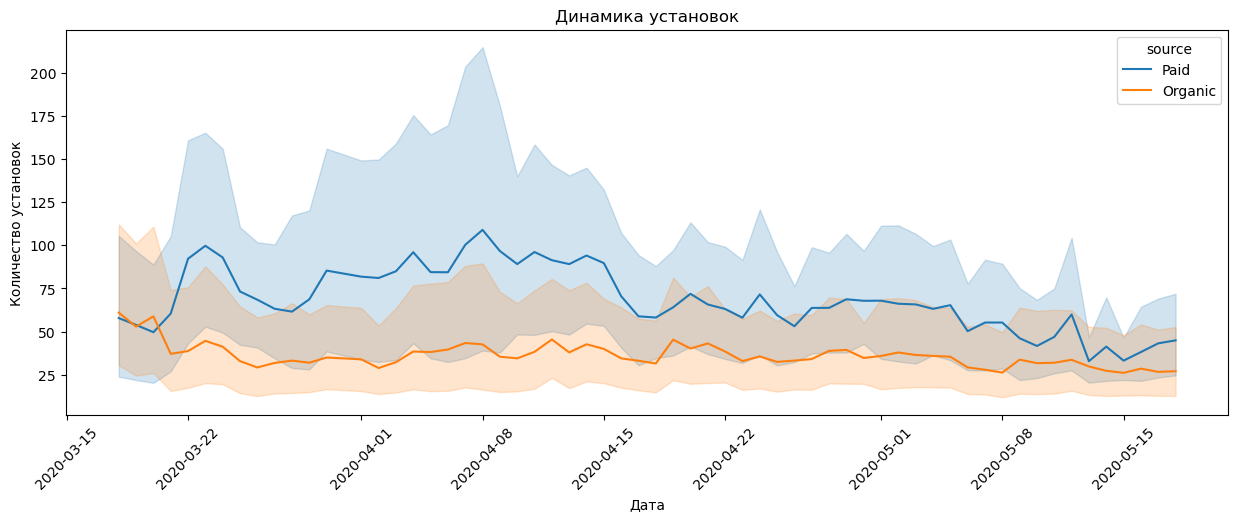

In [96]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_source, x='dates', y='installs', hue='source')
plt.title('Динамика установок')
plt.xlabel('Дата')
plt.ylabel('Количество установок')
plt.xticks(rotation=45)
plt.show()

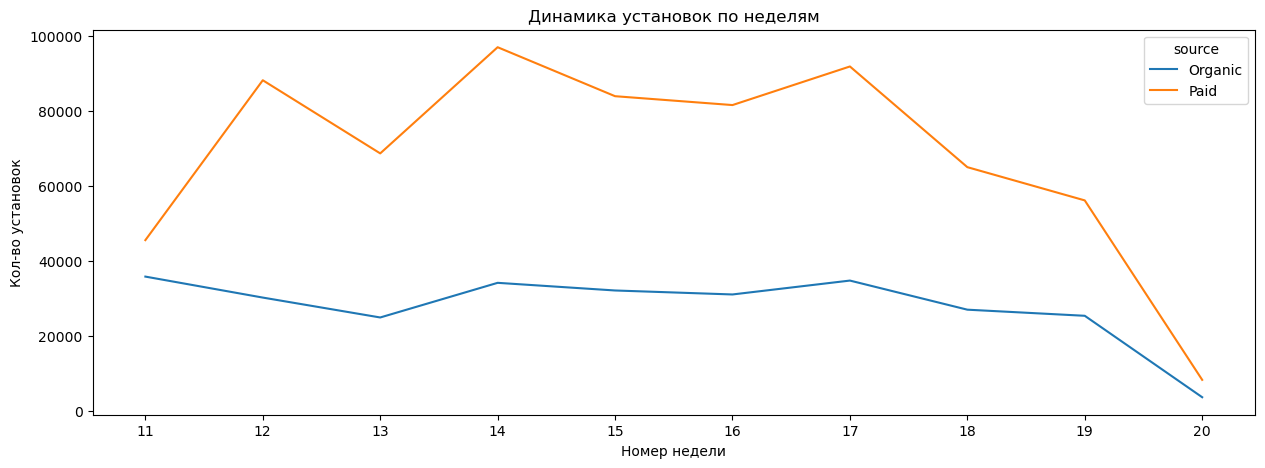

In [97]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df_source.groupby(['week', 'source'])['installs'].sum().reset_index(), x='week', y='installs', hue='source')
plt.title('Динамика установок по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Кол-во установок')
plt.show()

Т.о. в явном виде видно, что рекламного трафика больше. Единственный раз, когда органический тарфик был соразмерен с рекламным, было в первые дни 11 недели 2020 года - 15-18 марта.

Судя по графикам, какой либо четкой взаимосвязи между количеством установок в зависимости от источника трафика не прослеживается. В период 13-14 и 16-17 недель установки в обоих каналах растут, с 17 по 20 неделю оба канала падают. Но 100% уверености в том, что  есть четкая взаимосвязь графический анализ дать не может.

В целом аггрегацию по неделям или дням для предыдущего графика можно было бы получить с помощью следующего запроса: 

In [98]:
query = '''
SELECT strftime('%W', install_dates) AS week, 
       source_type AS source,
       SUM(installs) as installs
FROM source_comparison
GROUP BY 1,2
'''
df_week_agg = pd.read_sql_query(query, con)

df_week_agg.head()

,week,source,installs
0,11,Organic,35827.0
1,11,Paid,45708.0
2,12,Organic,30235.0
3,12,Paid,88374.0
4,13,Organic,24930.0


In [99]:
query = '''
SELECT DATE(Install_Dates) as dates, 
       source_type AS source,
       SUM(installs) as installs
FROM source_comparison
GROUP BY 1,2
'''
df_days_agg = pd.read_sql_query(query, con)

df_days_agg.head()

,dates,source,installs
0,2020-03-18,Organic,8961.0
1,2020-03-18,Paid,7359.0
2,2020-03-19,Organic,8457.0
3,2020-03-19,Paid,6739.0
4,2020-03-20,Organic,8819.0


Посмотрим на диаграммы рассеяния

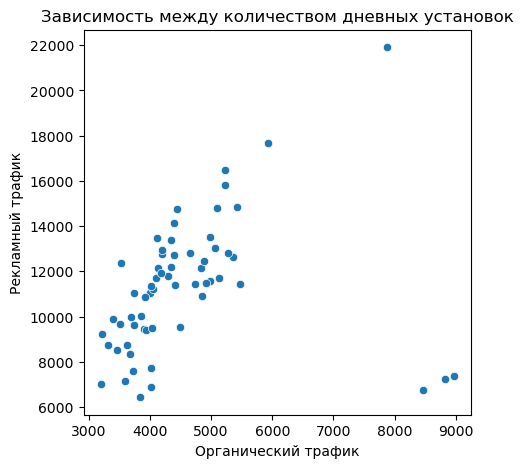

In [100]:
df_dates_agg_pivot = df_days_agg.pivot_table(index='dates', columns='source', values='installs', aggfunc='sum').reset_index()
plt.figure(figsize=(5,5))
sns.scatterplot(data = df_dates_agg_pivot, x='Organic', y='Paid')
plt.title('Зависимость между количеством дневных установок')
plt.xlabel('Органический трафик')
plt.ylabel('Рекламный трафик')
plt.show()

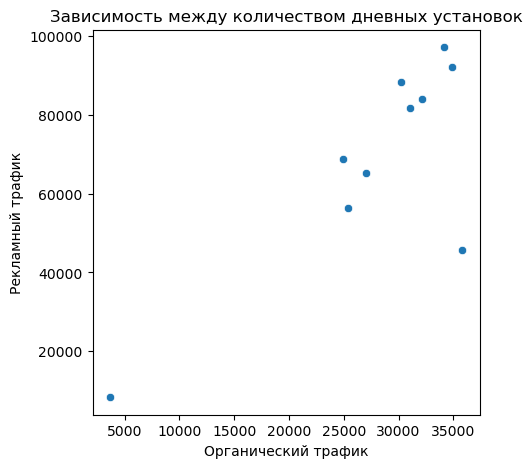

In [101]:
df_week_agg_pivot = df_week_agg.pivot_table(index='week', columns='source', values='installs', aggfunc='sum').reset_index()
plt.figure(figsize=(5,5))
sns.scatterplot(data = df_week_agg_pivot, x='Organic', y='Paid')
plt.title('Зависимость между количеством дневных установок')
plt.xlabel('Органический трафик')
plt.ylabel('Рекламный трафик')
plt.show()

В целом по данным диаграммам рассеяния можно заключить, что некая зависимость между кол-вом установок всё же существует.

2) **Корреляционный анализ**

Сформируем аггрегированные данные в разрезе источников трафика и рассчитаем коэфициент корреляции Пирсона. Аггрегированные данные будут представлять собой временные ряды "дата - количество установок"

Будет выявлено, что между общим количеством установок в день в зависимости от источника, коэффициент корреляции составляет 0,219, а между средними дневными значениями - 0,355.

Сдругой стороны, связь между недельным количеством установок выше - по суммарным значениям коэффициент корреляции составляет 0,799, по средним - 0,469

In [102]:
df_dates_pivot = df_source.pivot_table(index=['dates'], columns='source', values='installs', aggfunc = {'sum', 'mean'}).reset_index()
print('Коэф. корреляции между суммарным кол-вом установок в день:',df_dates_pivot[('sum', 'Organic')].corr(df_dates_pivot[('sum', 'Paid')]))
print('Коэф. корреляции между средним кол-вом установок в день:',df_dates_pivot[('mean', 'Organic')].corr(df_dates_pivot[('mean', 'Paid')]))

Коэф. корреляции между суммарным кол-вом установок в день: 0.21951848635126378
Коэф. корреляции между средним кол-вом установок в день: 0.3559584058243645


In [103]:
df_weeks_pivot = df_source.pivot_table(index=['week'], columns='source', values='installs', aggfunc = {'sum', 'mean'}).reset_index()
print('Коэф. корреляции между суммарным кол-вом установок в день:',df_weeks_pivot[('sum', 'Organic')].corr(df_weeks_pivot[('sum', 'Paid')]))
print('Коэф. корреляции между средним кол-вом установок в день:',df_weeks_pivot[('mean', 'Organic')].corr(df_weeks_pivot[('mean', 'Paid')]))

Коэф. корреляции между суммарным кол-вом установок в день: 0.7992683385263538
Коэф. корреляции между средним кол-вом установок в день: 0.46954356665832125


Т.о. на "недельных" данных частично гипотезу о зависимости рекламного и оргнаического трафика можно подтвердить. Существует высокая положительная корреляция между количеством установок. Чем больше установок в рамках органического трафика в неделю, тем больше 

3) **Кросс-корреляция**

Проверим взаимную корреляцию с учетом временных сдвигов

In [104]:
# зададим временные ряды
organic = df_dates_agg_pivot['Organic']
paid = df_dates_agg_pivot['Paid']

In [105]:
# зададим максимальный лаг
max_lag = 10
lags = range(-max_lag, max_lag + 1)

# c помощью цикла рассчиатем корреляции с лагом и запишем в список
# расчет корреляций проводим для organic относительно paid
cross_corr = []
for lag in lags:
    # cдвиг paid на значение текущего лага
    shifted_organic = organic.shift(lag)

    # корреляции
    correlation = paid.corr(shifted_organic)

    # добавление в список
    cross_corr.append(correlation)

# создадим датафрейм
cross_corr_df = pd.DataFrame({'lag': lags,'corr': cross_corr})

cross_corr_df.reset_index().sort_values(by='corr', ascending=False).head()

,index,lag,corr
14,14,4,0.394645
13,13,3,0.376768
15,15,5,0.360015
10,10,0,0.224341
12,12,2,0.189685


Т.е. наибольшая корреляция между ежедневными установками в зависимости от источника наблюдается при временном лаге 4 дня. Т.е. скорее всего максимальный эффект увеличения рекламного трафика на увеличение органического трафика наблюдается на 4-й день

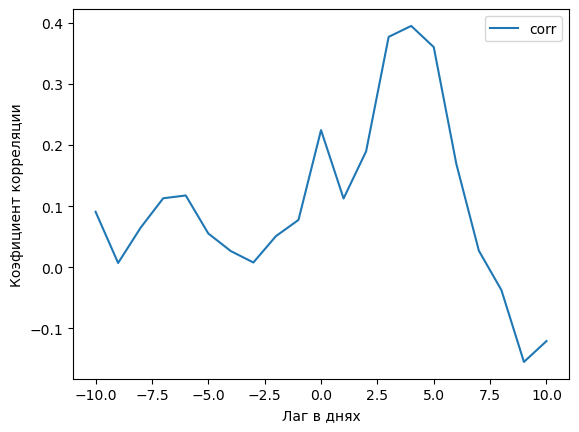

In [106]:
cross_corr_df.plot(x='lag', y='corr')
plt.xlabel('Лаг в днях')
plt.ylabel('Коэфициент корреляции')
plt.show()

In [107]:
end_time = time.time()

In [108]:
print(f'Время выполнения расчетов: {end_time - start_time} секунд')

Время выполнения расчетов: 22.592320680618286 секунд
